# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Loading Dataset

In [2]:
df=pd.read_csv(r"C:\Users\suresh biradar\Desktop\New folder (2)\ml\case study\insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# Data Preprocessing

In [3]:
# Checking Data Info Like Rows Columns Datatype Non Null Values,etc
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
# Checks for Statistical values 
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
# Counts count of different values
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [7]:
# Counts count of different values
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [8]:
# Counts count of different values
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [9]:
# Checks for Null Values 
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [10]:
df['charges'].value_counts

<bound method IndexOpsMixin.value_counts of 0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64>

In [11]:
# Feature selection 
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [12]:
# Checks for first Five rows BY Default
x.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


In [13]:
# Checks for first 10 rows
y.head(10)

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
5     3756.62160
6     8240.58960
7     7281.50560
8     6406.41070
9    28923.13692
Name: charges, dtype: float64

# Data Preprocessing
* Label encoding
* One hot encoding
* Outlier detection and removal

In [14]:
#LABEL ENCODING
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [15]:
# fitting Lebel encoder
x.sex=le.fit_transform(x.sex)
x.smoker=le.fit_transform(x.smoker)
x

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,southwest
1,18,1,33.770,1,0,southeast
2,28,1,33.000,3,0,southeast
3,33,1,22.705,0,0,northwest
4,32,1,28.880,0,0,northwest
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest
1334,18,0,31.920,0,0,northeast
1335,18,0,36.850,0,0,southeast
1336,21,0,25.800,0,0,southwest


In [16]:
# converting into dummies 
x=pd.get_dummies(x,columns=["region"])
x

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,0,0,0,1
1,18,1,33.770,1,0,0,0,1,0
2,28,1,33.000,3,0,0,0,1,0
3,33,1,22.705,0,0,0,1,0,0
4,32,1,28.880,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,0,1,0,0
1334,18,0,31.920,0,0,1,0,0,0
1335,18,0,36.850,0,0,0,0,1,0
1336,21,0,25.800,0,0,0,0,0,1


# EDA

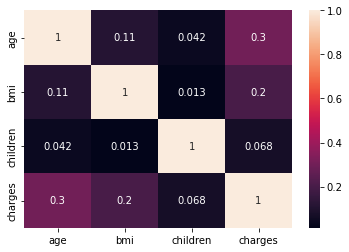

In [17]:
##correlation matrix plot using heatmap
sns.heatmap(df.corr(),annot=True)
plt.show()

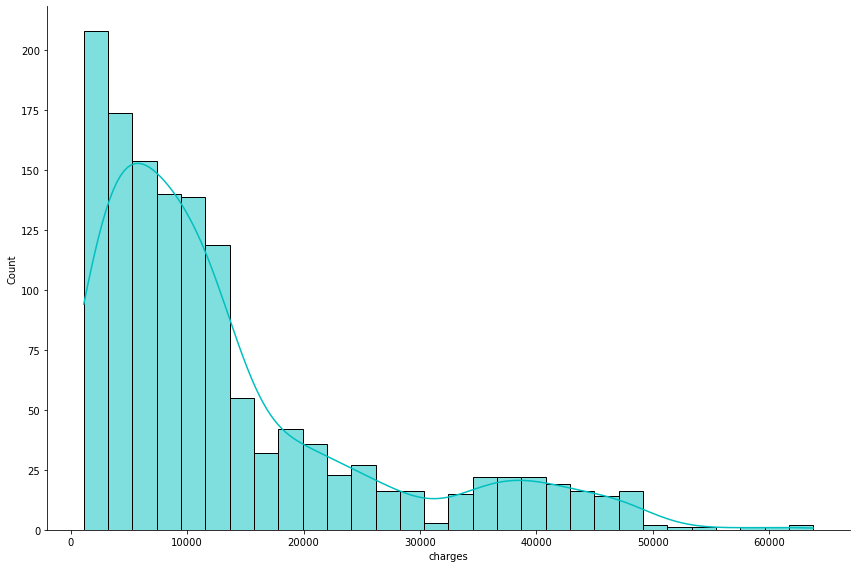

In [18]:
# checking for skewness
sns.displot(df.charges,kde=True,color="c",height=8,aspect=12/8)
plt.show()

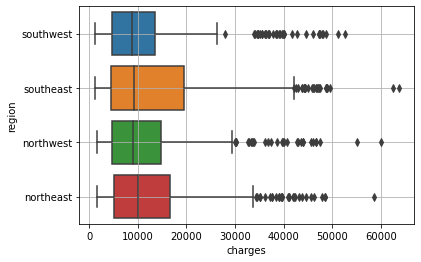

In [19]:
# Checking skewness
sns.boxplot(data=df,x='charges',y='region')  #seeing outliers
plt.grid()

In [20]:
#south_W=df[(df.region=='southwest')&(df.charges>20000)].index
#south_E=df[(df.region=='southeast')&(df.charges>22000)].index
#north_W=df[(df.region=='northwest')&(df.charges>25000)].index
#north_E=df[(df.region=='northeast')&(df.charges>25000)].index
#male=df[(df.sex=="male")&(df.charges>22000)].index
#female=df[(df.sex=='female')&(df.charges>22000)].index

In [21]:
#df.drop(south_W,inplace=True)
#df.drop(south_E,inplace=True)
#df.drop(north_W,inplace=True)
#df.drop(north_E,inplace=True)
#df.drop(male,inplace=True)
#df.drop(female,inplace=True)

In [22]:
#sns.boxplot(data=df,x='charges',y='region')  #seeing outliers
#plt.grid()

# Data scaling and modeling

In [23]:
# Splitting Data Into Training and Testing Where we can Train the Model and Test That Model
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [24]:
# Using standardization To normalize data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train= scaler.fit_transform(x_train)
x_test= scaler.transform(x_test)

# model building

In [25]:
# Using linear Regression model 
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [27]:
## Fitting the Model on Test Data
y_pred=regressor.predict(x_test)

In [28]:
y_pred

array([ 8969.55027444,  7068.74744287, 36858.41091155,  9454.67850053,
       26973.17345656, 10864.11316424,   170.28084137, 16903.45028662,
        1092.43093614, 11218.34318352, 28101.68455267,  9377.73460205,
        5263.0595179 , 38416.04221107, 40255.82339284, 37098.25353123,
       15240.39392306, 35912.88264434,  9112.52398703, 31461.92108909,
        3847.68845883, 10130.12001517,  2370.54189389,  7140.21550828,
       11301.76782638, 12961.65366224, 14509.47251876,  6159.8976107 ,
        9963.85857263,  2177.85718217,  9115.93673493, 13073.68932159,
        4561.82376202,  3408.20756033,  4459.81359745, 13032.06505076,
        1979.99357292,  8813.28303302, 33271.29124448, 32585.51583927,
        3908.76090964,  4326.10774721, 14142.81326533, 11423.45494846,
        8774.13955311, 12097.28051001,  5281.57353499,  3150.5596042 ,
       35494.46461214,  9150.1124786 , 15836.84575621,  2343.57470069,
       12364.78414194,  1482.29488266, 13389.06105161, 12573.57395972,
      

In [29]:
y_test

764      9095.06825
887      5272.17580
890     29330.98315
1293     9301.89355
259     33750.29180
           ...     
109     47055.53210
575     12222.89830
535      6067.12675
543     63770.42801
846      9872.70100
Name: charges, Length: 268, dtype: float64

In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE : {mae}\nMSE : {mse}\nRMSE : {rmse}\nAccuracy : {r2}")

MAE : 4181.1944737536505
MSE : 33596915.851361476
RMSE : 5796.284659276274
Accuracy : 0.7835929767120722


In [32]:
# printing train and test score
print('Train Score: ', regressor.score(x_train, y_train))  
print('Test Score: ', regressor.score(x_test, y_test))

Train Score:  0.7417255854683333
Test Score:  0.7835929767120722


In [33]:
from sklearn.preprocessing import PolynomialFeatures

In [34]:
# Applying polinomial Regression
quad = PolynomialFeatures (degree = 2)
x_quad = quad.fit_transform(x)

x_train,x_test,y_train,y_test = train_test_split(x_quad,y, random_state = 0)

plr = LinearRegression().fit(x_train,y_train)

Y_train_pred = plr.predict(x_train)
Y_test_pred = plr.predict(x_test)

print("Accuracy :",plr.score(x_test,y_test))

Accuracy : 0.8768055632931815


In [35]:
from sklearn.ensemble import RandomForestRegressor

In [36]:
# applying Random Forest Regression
forest = RandomForestRegressor(n_estimators = 100,
                              criterion = 'mse',
                              random_state = 1,
                              n_jobs = -1)
forest.fit(x_train,y_train)
y_pred = forest.predict(x_train)
y_pred = forest.predict(x_test)

C:\Users\suresh biradar\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE : {mae}\nMSE : {mse}\nRMSE : {rmse}\nAccuracy : {r2}")

MAE : 2666.7246478890793
MSE : 19708395.280434567
RMSE : 4439.41384424054
Accuracy : 0.8748152807723846


In [38]:
print('Train Score: ',forest.score(x_train, y_train))  
print('Test Score: ', forest.score(x_test, y_test))

Train Score:  0.9732802949667545
Test Score:  0.8748152807723846


In [39]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
tree_reg = DecisionTreeRegressor()
tree_reg.fit(x_train,y_train)


DecisionTreeRegressor()

In [40]:
print('Train Score: ',tree_reg.score(x_train, y_train))  
print('Test Score: ', tree_reg.score(x_test, y_test))

Train Score:  0.9994547916438284
Test Score:  0.6733673732170335


* By descision tree model is over training means over fitting is occuring